<a href="https://colab.research.google.com/github/tanvi20206/launchhack/blob/main/LaunchHackIII_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.1.1


In [ ]:

!unzip /content/drive/MyDrive/Launchhack/archive.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Preprocessing###

In [ ]:
import tensorflow as tf

training_set = tf.keras.utils.image_dataset_from_directory (
    '/content/gdrive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


### Validation Set ###

In [ ]:
import tensorflow as tf

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/gdrive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x , y in training_set :
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[196.5  210.5  184.5 ]
   [204.   218.   192.  ]
   [203.25 219.25 192.25]
   ...
   [131.5  171.5  108.5 ]
   [133.   173.   110.  ]
   [136.75 177.75 111.75]]

  [[190.75 204.75 178.75]
   [189.5  205.5  178.5 ]
   [197.   213.   186.  ]
   ...
   [132.25 172.25 109.25]
   [134.   174.   111.  ]
   [133.25 174.25 108.25]]

  [[194.   210.   183.  ]
   [189.   205.   178.  ]
   [192.   211.   183.  ]
   ...
   [128.25 168.25 105.25]
   [129.25 169.25 106.25]
   [134.5  175.5  109.5 ]]

  ...

  [[ 68.25 105.25  53.25]
   [ 68.25 105.25  51.25]
   [ 70.75 107.75  53.75]
   ...
   [166.5  173.75 140.  ]
   [150.   148.75 122.25]
   [110.75 104.    83.75]]

  [[ 70.   107.    55.  ]
   [ 67.25 104.25  50.25]
   [ 65.25 102.25  48.25]
   ...
   [154.75 152.75 129.25]
   [111.75 100.5   85.5 ]
   [ 76.5   59.    50.25]]

  [[ 69.25 106.25  54.25]
   [ 67.25 104.25  50.25]
   [ 65.75 102.75  48.75]
   ...
   [121.   114.    96.  ]
   [ 58.5   41.    32.25]
   [ 50.75  26.25  2

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D

In [ ]:
model = Sequential()

In [ ]:
## building convolution layer

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation ='relu' ,input_shape =[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation ='relu' ))
model.add(Conv2D(filters=64,kernel_size=3,activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation ='relu' ))
model.add(Conv2D(filters=128,kernel_size=3,activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation ='relu' ))
model.add(Conv2D(filters=256,kernel_size=3,activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation ='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Dropout(0.25)) # to avoid overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500, activation ='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
# output layer
model.add(Dense(units=38,activation='softmax'))

**COMPILING MODEL**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

**MODEL TRAINING**


In [ ]:
print(model.input_shape)

(None, 128, 128, 3)


In [ ]:
for layer in model.layers:
    print(layer.name)



conv2d
conv2d_1
max_pooling2d
conv2d_2
conv2d_3
max_pooling2d_1
conv2d_4
conv2d_5
max_pooling2d_2
conv2d_6
conv2d_7
max_pooling2d_3
conv2d_8
conv2d_9
max_pooling2d_4
dropout
flatten
dense
dense_1
dropout_1
dense_2


In [ ]:
training_history = model.fit(x=training_set , validation_data=validation_set,epochs=10) # training is done on kaggle as In my system it takes lots of time due to low GPU

**Model evaluation on Training set**

In [ ]:
train_loss,train_acc = model.evaluate(training_set) # done on kaggle

In [ ]:
print(train_loss, training_acc)  # done on kaggle

In [ ]:
val_loss,val_acc = model.evaluate(validation_set)  # done on kaggle

In [ ]:
print(val_loss, val_acc)  # done on kaggle

**saving model**

In [ ]:
model.save("trained_model.h5")  # done on kaggle

In [ ]:
model.save("trained_model.keras")  # done on kaggle

In [ ]:
training_history.history # done on kaggle

In [ ]:
# Recording history

import json
with open("training_hist.json","w") as f: # done on kaggle
  json.dump(training_history.history,f)

**Loading the model from Kaggle **

In [28]:
from tensorflow.keras.models import load_model

model = load_model('/content/traintmodel_model.h5')

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,764 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
print(model.input_shape)


(None, 128, 128, 3)


In [31]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [32]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 18209s 8s/step - accuracy: 0.9910 - loss: 0.0292


In [33]:
print(train_loss, train_acc)

0.02853020653128624 0.9911942481994629


In [34]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 4071s 7s/step - accuracy: 0.9633 - loss: 0.1231


In [35]:
print(val_loss, val_acc)

0.12434091418981552 0.9648303985595703


In [ ]:
import json
from keras.models import model_from_json

# Load model architecture from JSON file
with open('/content/training_hist.json', 'r') as json_file:
    training_history = json.load(json_file)

print(training_history)

{'accuracy': [0.7021267414093018, 0.90572589635849, 0.9441069960594177, 0.9615193009376526, 0.9708940982818604, 0.9772814512252808, 0.9803826808929443, 0.98381108045578, 0.9843943119049072, 0.9873817563056946], 'loss': [1.0067499876022339, 0.29399898648262024, 0.17053952813148499, 0.11519059538841248, 0.08835630118846893, 0.07012158632278442, 0.05941791087388992, 0.04956379905343056, 0.04720395430922508, 0.03837377578020096], 'val_accuracy': [0.8996699452400208, 0.9267584681510925, 0.9393922090530396, 0.9593102931976318, 0.9585704803466797, 0.9647166132926941, 0.9661393165588379, 0.959822416305542, 0.9698383808135986, 0.9461643695831299], 'val_loss': [0.3165130615234375, 0.22458063066005707, 0.18667089939117432, 0.12871390581130981, 0.1354214996099472, 0.12088548392057419, 0.12314071506261826, 0.15090811252593994, 0.10122226178646088, 0.2155602127313614]}


In [ ]:
# Extract the required variables from the loaded JSON data
loss = training_history['loss']
accuracy = training_history['accuracy']
val_loss =training_history['val_loss']
val_accuracy = training_history['val_accuracy']

# Now you can use these variables as needed
print("Training Loss:", loss)
print("Training Accuracy:", accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [0.8235571384429932, 0.3719416856765747, 0.23154641687870026, 0.16665790975093842, 0.12465765327215195, 0.1002952978014946, 0.0809408575296402, 0.07273406535387039, 0.06021951511502266, 0.05453653261065483]
Training Accuracy: [0.7454726696014404, 0.8808307647705078, 0.9247457385063171, 0.9455864429473877, 0.9589728713035583, 0.9672096371650696, 0.9740948677062988, 0.9762856364250183, 0.979898989200592, 0.9823742508888245]
Validation Loss: [0.4237661063671112, 0.23448172211647034, 0.1851380318403244, 0.1694166213274002, 0.17860782146453857, 0.12927769124507904, 0.12323064357042313, 0.15736792981624603, 0.09915526956319809, 0.12229359149932861]
Validation Accuracy: [0.8656384944915771, 0.9255064725875854, 0.9423514604568481, 0.9455952644348145, 0.9449692964553833, 0.9598793387413025, 0.9605622291564941, 0.9556680917739868, 0.9709765315055847, 0.9659686088562012]


In [ ]:
accu = training_history['val_accuracy']
accu

[0.8656384944915771,
 0.9255064725875854,
 0.9423514604568481,
 0.9455952644348145,
 0.9449692964553833,
 0.9598793387413025,
 0.9605622291564941,
 0.9556680917739868,
 0.9709765315055847,
 0.9659686088562012]

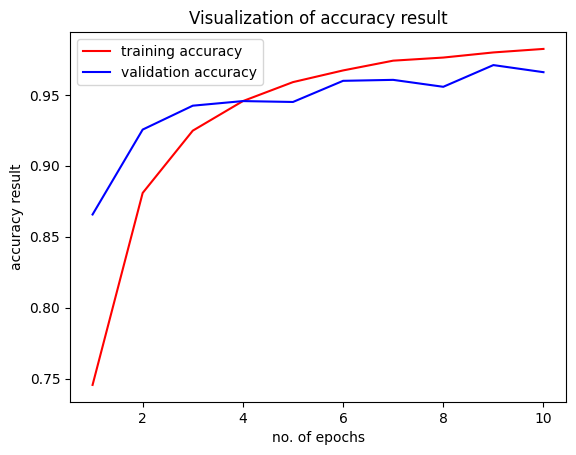

In [ ]:
import matplotlib.pyplot as plt
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history['accuracy'],color='red',label='training accuracy')
plt.plot(epochs,training_history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("accuracy result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred , y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 1984s 4s/step


(array([[9.99999940e-01, 1.59700517e-11, 1.80512420e-15, ...,
         8.05429236e-21, 1.67765450e-19, 1.54352533e-18],
        [9.99999940e-01, 4.36944170e-09, 3.21084874e-13, ...,
         2.82551559e-18, 4.63088529e-17, 1.43488850e-16],
        [9.99999940e-01, 6.27742428e-15, 1.17415418e-17, ...,
         7.32688811e-29, 3.12487847e-25, 4.17836650e-22],
        ...,
        [3.17148707e-09, 4.71204327e-14, 4.74487914e-11, ...,
         2.51972575e-12, 1.49541783e-13, 9.99999881e-01],
        [3.08294545e-08, 8.39677340e-13, 9.34203964e-11, ...,
         4.63391853e-10, 1.04248355e-11, 9.99996901e-01],
        [5.77361533e-16, 5.99964355e-18, 7.49545067e-16, ...,
         2.11605390e-15, 1.74176842e-14, 9.99999285e-01]], dtype=float32),
 (17572, 38))

In [ ]:
y_pred

array([[9.99999940e-01, 1.59700517e-11, 1.80512420e-15, ...,
        8.05429236e-21, 1.67765450e-19, 1.54352533e-18],
       [9.99999940e-01, 4.36944170e-09, 3.21084874e-13, ...,
        2.82551559e-18, 4.63088529e-17, 1.43488850e-16],
       [9.99999940e-01, 6.27742428e-15, 1.17415418e-17, ...,
        7.32688811e-29, 3.12487847e-25, 4.17836650e-22],
       ...,
       [3.17148707e-09, 4.71204327e-14, 4.74487914e-11, ...,
        2.51972575e-12, 1.49541783e-13, 9.99999881e-01],
       [3.08294545e-08, 8.39677340e-13, 9.34203964e-11, ...,
        4.63391853e-10, 1.04248355e-11, 9.99996901e-01],
       [5.77361533e-16, 5.99964355e-18, 7.49545067e-16, ...,
        2.11605390e-15, 1.74176842e-14, 9.99999285e-01]], dtype=float32)

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories= tf.concat([y for x,y in test_set],axis=0)

In [ ]:
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_true, predicted_categories,target_names =class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.99      0.94       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.96       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [ ]:
conm=confusion_matrix(y_true,predicted_categories)

In [ ]:
conm

array([[498,   1,   0, ...,   0,   0,   0],
       [  1, 495,   0, ...,   0,   0,   0],
       [  7,   0, 415, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  2,   0,   0, ...,   0,   0, 470]])

In [ ]:
conm.shape

(38, 38)

<function matplotlib.pyplot.show(close=None, block=None)>

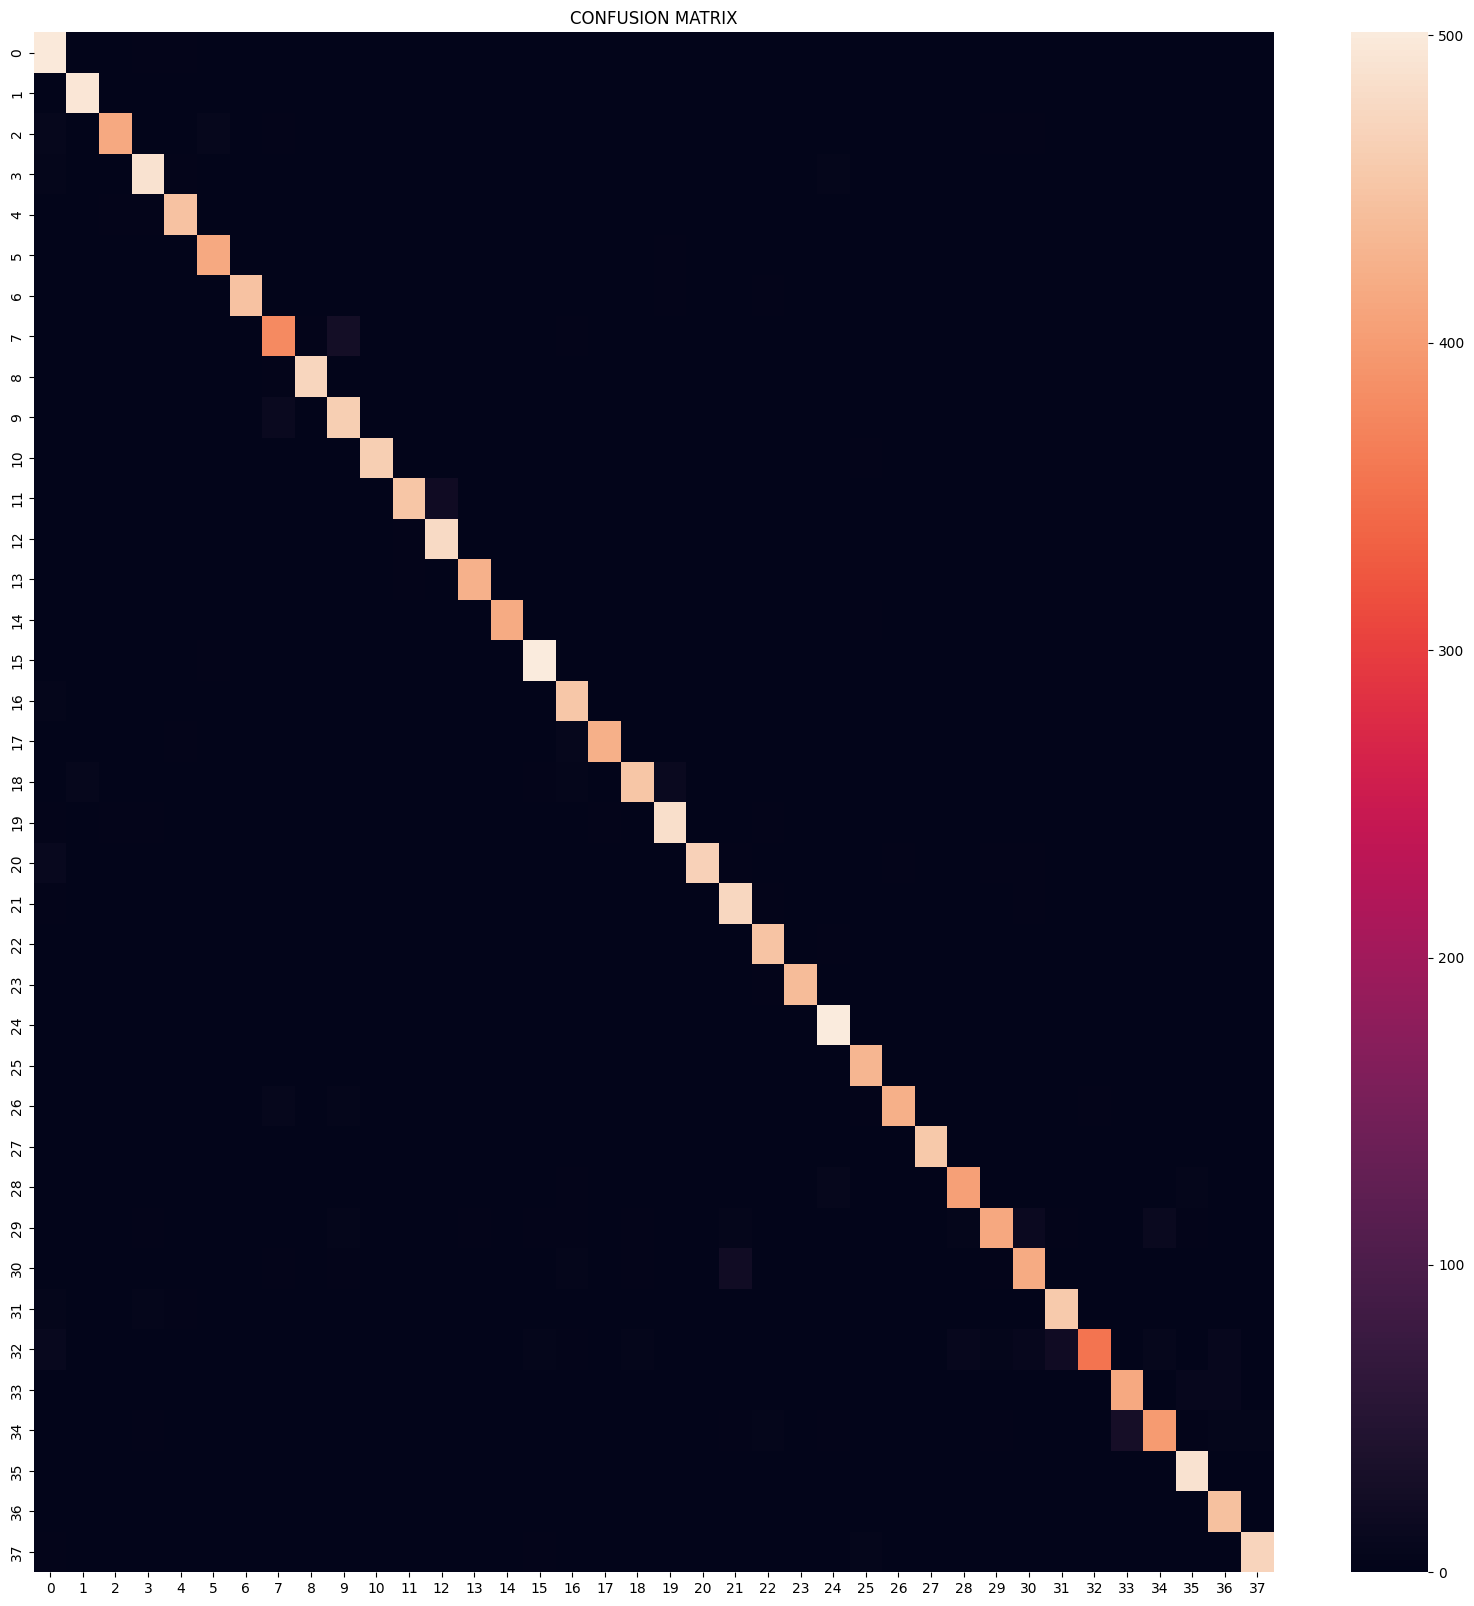

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(conm)
plt.title("CONFUSION MATRIX")
plt.show

In [ ]:
# after this test the model in differnt file